<a href="https://colab.research.google.com/github/Aruvi-B/Machine-Learning/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

In [ ]:
data.isnull().sum()
data = data.drop("Surname", axis = 1)

In [ ]:
data.shape

(10000, 13)

In [ ]:
X = data.drop(['Exited'], axis = 1)
y = data['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

In [ ]:
print("Total", len(X))
print("Train size ", len(X_train))
print("Test size ", len(X_test))

Total 10000
Train size  8000
Test size  2000


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("Train data", model.score(X_train,y_train))
print("Test data" , model.score(X_test,y_test))


Train data 0.7945
Test data 0.8035


[[1607    0]
 [ 393    0]]


Text(20.72222222222222, 0.5, 'Truth')

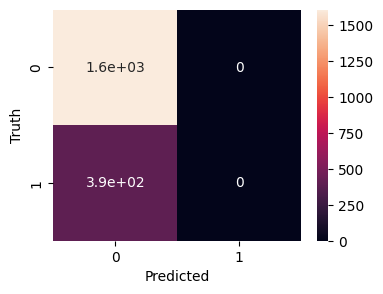

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train.values.ravel())
rf_predition = rf_model.predict(X_test_scaled)

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train.values.ravel())
gb_predition = gb_model.predict(X_test_scaled)


Model: Random Forest
Accuracy: 86.3
Confusion Matrix:
 [[1552   55]
 [ 219  174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

__________________________________________________________________


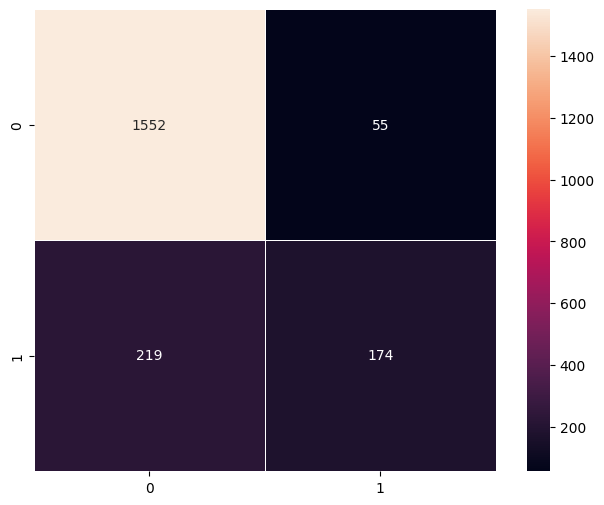

Model: Gradient Boosting
Accuracy: 86.5
Confusion Matrix:
 [[1552   55]
 [ 215  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000

__________________________________________________________________


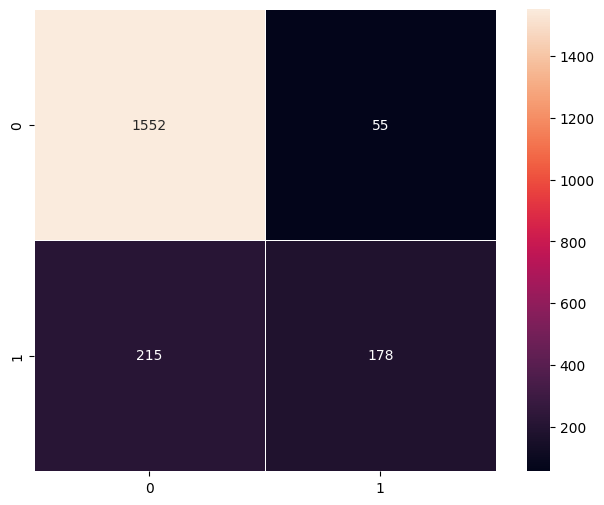

In [ ]:
import seaborn as sns
models = ['Random Forest', "Gradient Boosting"]
predictions = [rf_predition, gb_predition]

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    classification_rep = classification_report(y_test, pred)

    print(f"Model: {model}")
    print(f"Accuracy: {accuracy * 100}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)

    print("__________________________________________________________________")


    # confusion matrix
    plt.figure(figsize = (8, 6))
    sns.heatmap(conf_matrix,annot = True, fmt = 'd', linewidth = 0.5, square = True)
    plt.show()
